## *Building a Neural Network from scratch using Numpy*
## Project Description
### Overview
A neural network is a set of algorithms that aim to recognize the underlying pattern in the data. These are subsets of Machine learning and the heart of deep learning algorithms. Neural networks are inspired by the working of the human brain. 
Neural networks are applied in many real-life applications like self-driving cars, speech recognition, medical diagnosis, and many more.
In this project, I will be building a neural network from scratch just by using NumPy only and not by using any deep learning frameworks. The built neural network will predict the price of the house in Pune, India. This project will also give us an in-depth idea about the working of neural networks. 
### Aim
- To understand the working of Neural networks
- To build a neural network from scratch using NumPy 



### Data Description
The dataset contains information about the prices of houses based on various attributes. The dataset contains the prices of houses from Pune, Maharashtra(India). 



### Tech Stack
Language: Python
Libraries: pandas, sci-kit learn, numpy



### Approach
- Data Preprocessing
- Removing null values
- Scaling numerical features
- One-Hot encoding of categorical data
 

### Model Training
Training neural network model
 

### Model Evaluation
Evaluation of model on test data



In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## The Dataset
The dataset consists of house price data for properties in Pune, India. We have 200 individual data points across 17 different features.
We will start by loading and visualising the data, analysing the variable types, and selecting the variables needed.



In [3]:
# load the data
df = pd.read_excel('/Users/hp/Downloads/Real_Estate_Data.xlsx')

In [4]:
# view the top rows
df.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492.0,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774.0,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889.0,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018.0,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743.0,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [5]:
# check the data types in our dataframe:
df.dtypes

Sr. No.                               int64
Location                             object
Sub-Area                             object
Propert Type                         object
Property Area in Sq. Ft.            float64
Price in lakhs                       object
Price in Millions                   float64
Company Name                         object
TownShip Name/ Society Name          object
Total TownShip Area in Acres        float64
ClubHouse                            object
School / University in Township      object
Hospital in TownShip                 object
Mall in TownShip                     object
Park / Jogging track                 object
Swimming Pool                        object
Gym                                  object
dtype: object

Analysing the dataset, I can see that I have a mixture of data types, some are quantitative (i.e., *'int64'*, *'float64'*), but the majority qualitative in nature (*'object'*). To run our *Neural Network Model (Multilayer Perceptrons)*, I will need to have floating variables only (*'float64'*) as these are the only variable type the neural network can perform computation on; it can also work with integer numbers, but it will convert them into floating. 

## Dataset Cleaning
Specifically, I am going to follow the below steps:
1. Extract the relevant variables.
2. Remove rows containing *'NaN'* values, if any.
3. Convert qualitative variables into quantitative, i.e., from *'object'* to *'float64'*.
4. Scale variables, if needed.

### Extract the relevant variables

For my model, I am going to select 5 variables that are probably the most relevant:
1. Propert Type
2. Property Area in Sq. Ft.
3. Sub-Area
4. Swimming Pool
5. Price in Millions

Important to note, *'Price in Millions'* is the variable I want to predict, therefore, I will split it from the dataset afterwards.

Let's start by selecting those variables.


In [6]:
# variables selection
df_selection = df[['Propert Type','Property Area in Sq. Ft.','Sub-Area','Swimming Pool','Price in Millions']]

In [7]:
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions
0,1 BHK,492.0,Bavdhan,Yes,3.9
1,2 BHK,774.0,Bavdhan,Yes,6.5
2,3 BHK,889.0,Bavdhan,Yes,7.4
3,3 BHK Grand,1018.0,Bavdhan,Yes,8.9
4,2BHK,743.0,Mahalunge,Yes,7.4


## Removing missing Data
Missing data can be handle in different ways, e.g., replacing, interpolating, or removing data, depending on the size of the dataset, and the usefulness of that data point. In this case, I am going to remove each row containing *missing data*, or *NaN*, to avoid errors when running the model.

Let's check if I have any missing data in our dataset.

In [8]:
# let's check if we have any 'NaN' in the dataset
nan_rows = df_selection[df_selection.isnull().any(axis = 1)]
nan_rows

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions
41,3BHK,1705.0,Keshav Nagar,Yes,NaN


We can see that row 41 includes missing values, therefore, we are going to drop them using the *`drop`* function.

In [9]:
# given we do have 'NaN' values, let's store them in a new variable ('nan_rows') and drop their respective rows
nan_rows = nan_rows.index.values

In [10]:
# drop the respective rows
df_selection = df_selection.drop(nan_rows)

In [11]:
# let's check that all rows containing NaN values have been removed
df_selection[df_selection.isnull().any(axis = 1)]

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions


### Variables Conversion from Qualitative to Quantitative
All the variables extracted from the original database, except for `'Price in Millions'`, are qualitative variables. 
Therefore, I will need to convert them into quantitative variables.

Let's start with the first variable, `'Propert Type'`, which, as the header suggests, represents the property type (i.e., 1 BHK is 1 bedroom, hall, and kitchen, 2 BHK is 2 bedroom, hall, and kitchen and so on). To convert the variable into *float*, I am going to extract the number included in the variable's value. 

In [12]:
# extract the numerical value for the 'Propert Type'
df_selection['Propert Type'] = df_selection['Propert Type'].str.extract('(\d+)')

We must be aware that, this operation could have generated additional missing values. In the case one variable's value didn't include a number, but text only, the resulting value would be *NaN*. Therefore, I need to check once again, if missing values have been generated.

In [13]:
# let's check if we have any 'NaN' in the dataset
nan_rows = df_selection[df_selection.isnull().any(axis = 1)]
nan_rows

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions
51,NaN,163.0,pimpri pune,no,5.4


 As expected, row 51 is now *NaN*. Let's drop it and go on with the data cleaning. 

In [15]:
# given we do have 'NaN' values, let's store them in a new variable ('nan_rows') and drop their respective rows
nan_rows = nan_rows.index.values
# drop the respective rows
df_selection = df_selection.drop(nan_rows)

Let's now move to the next variable, `'Sub-Area`.
In this case, we want to convert the variable, which is a categorical variable, into a format that can be readily used by our neural network. To do so, we are using *'one-hot encoding'*, which helps us creating new binary variables (i.e.,including only True or False) to represent the original categorical values.

In [16]:
# converting our categorical variables using 'one-hot encoding' 
area_encoded = pd.get_dummies(df_selection['Sub-Area'].str.lower().str.strip(), prefix = 'area', dtype = 'float64')

# check the categorical variables
area_encoded.head()

,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,area_dhanori,area_hadapsar,area_handewadi,area_hinjewadi,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I can then concatenate the data base to our new binary variables using *`concat`*.

In [17]:
# concatenate df_selection with encoded variables
df_selection = pd.concat([df_selection,area_encoded], axis = 1)

# check the updated dataset
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1,492.0,Bavdhan,Yes,3.9,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,774.0,Bavdhan,Yes,6.5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,889.0,Bavdhan,Yes,7.4,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1018.0,Bavdhan,Yes,8.9,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,743.0,Mahalunge,Yes,7.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I can now remove the `'Sub-Area'` variable, using again the *`drop`* function.

In [19]:
# drop the 'Sub-Area' variable
df_selection = df_selection.drop('Sub-Area', axis = 1)

Let's finally have a look at the last variable, `'Swimming Pool'`. In particular, I want to analyse the its values.

In [20]:
df_selection['Swimming Pool'].unique()

array(['Yes', 'No', 'no', 'yes', 'no '], dtype=object)

We can see that the array contains different values (some in lowercase, some in uppercase, and others with unnecessary space). Therefore, we need to (1) convert the values in lowercase using *`lower()`*, (2) remove any space using *`strip()`*, and (3) convert from string to binary using *`map()`*.

In [21]:
# convert the 'Swimming Pool' variable from string to binary
df_selection['Swimming Pool'] = df_selection['Swimming Pool'].str.lower().str.strip().map(
    {'yes': True , 'no': False}
)

Let's check if we have converted correctly the variable `'Swimming Pool'` to binary, so that its values are True or False.

In [23]:
# check if the conversion happened correctly
df_selection['Swimming Pool'].unique()

array([ True, False])

### Variable Scaling
The final step consists of scaling (i.e., normalising between 0 and 1) the `'Property Area in Sq.Ft.'` as its values are too large compared to the other variables' values; this would overpower the other inputs' activations resulting in an unfair representation in the network. To do so, we are going to use the *`MinMaxScaler()`*.

In [24]:
# scale the 'Property Area in Sq.Ft.' variable 
scaler = MinMaxScaler()
df_selection['Property Area in Sq. Ft.'] = scaler.fit_transform(df_selection[['Property Area in Sq. Ft.']])

/Users/hp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Let's check the resulting scaled variable:

In [25]:
df_selection['Property Area in Sq. Ft.'].head()

0    0.162382
1    0.283205
2    0.332476
3    0.387746
4    0.269923
Name: Property Area in Sq. Ft., dtype: float64

## The Clean Dataset
At this point, I should have cleaned our dataset, which should contain only float variables.
Let's ensure that this is true by converting all values to float.

In [26]:
# ensuring our variables are float
df_selection['Propert Type'] = df_selection['Propert Type'].astype(float, errors = 'raise')
df_selection['Property Area in Sq. Ft.'] = df_selection['Property Area in Sq. Ft.'].astype(float, errors = 'raise')
df_selection['Swimming Pool'] = df_selection['Swimming Pool'].astype(float, errors = 'raise')  
df_selection['Price in Millions'] = df_selection['Price in Millions'].astype(float, errors = 'raise')

In [27]:
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1.0,0.162382,1.0,3.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.283205,1.0,6.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.332476,1.0,7.4,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.387746,1.0,8.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.269923,1.0,7.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 I can split our dataset in 2: one including all variables except for the `'Price in Millions'`, and one including only `'Price in Millions'`. This step will allow us to compare the variable predicted with the model to the actual variable, which is `'Price in Millions'`.

In [28]:
# dataset including all variables, but 'Price in Millions'
X = df_selection.drop(['Price in Millions'], axis = 1)
print(X.shape)

# dataset including only 'Price in Millions'
Y = df_selection['Price in Millions']
print(Y.shape)

(198, 36)
(198,)


Later on, I will need to perform array operations; therefore, if we have arrays with different shapes, we need to reshape them to make them comparable and be able to perform element-wise operations. This is the case of the variable `'Y'`, which has currently the shape (198,), but should be (198,1). Let's reshape it using *`reshape`*.

In [29]:
# reshape the array
Y = Y.values.reshape((Y.shape[0], 1)) 
print(Y.shape)

(198, 1)


I can now create *test data* and *training data*. Test data excludes the first 150 rows, while test data includes the last 48 rows. Also in this case, I need to transpose the data to be able to perfrom array operations.

In [30]:
# test data and shape
X_test=X[150:].T  
Y_test=Y[150:].T  
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

#training data and shape
X_train = X[:150].T
Y_train = Y[:150].T
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)  

X_test: (36, 48)
Y_test: (1, 48)
X_train: (36, 150)
Y_train: (1, 150)


## Model Training
### Single-Layer Neural Network Computation
I am now going through the *Single-Layer* computation, the simplest form of neural network. Defined like that as there is only one layer of input nodes that send weighted inputs to a subsequent layer of receiving nodes.

I will start with the forward-propagation and finish with backward propagation.

### Forward Propagation
The process is based on the below two steps:
1. *Inputs initialization*. Weighted sum of inputs from the previous layer plus the bias.

2. *Activation*. The calculated weighted sum of inputs is passed to the activation function to add non-linearity to the network. Among the most popular activation functions, we are considering the *Rectified Linear Unit (ReLU) activation function*.

With the *inputs initialization*, we want to initialize the weights (`W`), the bias (`b`), and the resultant output (`Z`) from these.
 
The weight initialization usually depends on the activation function considered in the analysis. The standard approach when using a ReLU activation function is the *he* initialization method.

This method generates weights as a random number with a Gaussian probability distribution (G) with a mean of 0.0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the node.

weight ~ G (0.0, sqrt(2/n))

In our example, n equals 36.


In [31]:
# the 'he' initialization
n_in = X_train
n_out = Y_train
n = n_in.shape[0] # this equals to 36
print(n)
# calculate the standard deviation
std = np.sqrt(2.0/n_out.shape[0])
# calculate the weights
W = np.random.randn(n_out.shape[0], n_in.shape[0]) * std
W

36


array([[ 1.26623607e+00,  1.59799743e+00, -1.77261619e+00,
         1.45298337e+00,  1.97168010e+00, -2.13000813e+00,
        -2.65996382e+00,  5.14330696e-01, -1.70626985e-01,
         2.51505802e+00,  1.73670326e-01, -1.50005041e+00,
         4.84546659e-02, -1.25021463e-01, -1.82160749e-01,
        -1.74692412e-01,  1.14507147e+00, -3.21256967e-01,
         1.88122880e-01, -9.87429721e-01,  3.32081929e+00,
         1.70494399e+00, -1.70533966e+00,  9.30083748e-01,
         2.10485620e-03, -1.28063438e-01, -1.87949932e+00,
        -1.30315268e+00,  1.55026618e+00,  3.72051969e-01,
        -7.25985046e-01, -2.56654748e-01, -2.43487988e+00,
         1.31621940e+00,  1.26870410e+00, -6.48567778e-01]])

Once I initialized the weights, we should do the same with the bias (`b`). In this case, I will set it to zero, for simplicity.

In [32]:
n_out.shape

(1, 150)

In [33]:
# initialize bias 'b' as zero
b = np.zeros((n_out.shape[0], 1))

Now, we are ready to perform a *forward-propagation*, which refers to the calculation and storage of intermediate variable (`Z`) for a neural network from the input layer to the output layer.

$$Z = X^{T}W + b$$

In [34]:
# initialize the intermediate variable
Z = np.dot(W, n_in) + b
Z.shape

(1, 150)

Next, I pass to the *activation*. The scope is to process the output $Z$ through an *activation function*. As mentioned, I have chosen to use the *ReLU* function for our activation. This is a linear function that will output the input directly if it is positive, otherwise, it will output zero.

The output $\hat{Y}$ represents our *prediction*.

In [35]:
# ReLU function
Y_hat = np.maximum(0,Z)

In [36]:
Y_hat.shape[1]

150

We are now going to compare the prediction $\hat{Y}$ to a *true* value $Y$ to calculate the *Mean Squared Error (MSE)* between predicted and true values. This can be calculated using the Loss Function $L(\hat{Y},Y)$.
$$MSE = L(\hat{Y},Y) = \frac{1}{n}\ (\hat{Y} - Y)^{2}$$

In [37]:
# define the true value 'Y' and the sample size 'n'
Y = Y_train
n = Y_hat.shape[1]

# calculate the mean squared error or loss function
E = (1 / n) * np.sum(np.square(Y_hat - Y))  

In [38]:
# this is the error before training our neural network
E, E.shape

(166.14102964794716, ())

### Backward Propagation
This is a way of propagating the total loss back into the neural network to see how much of the loss every node is responsible for, and then updating the weights to minimize the loss by giving the nodes with higher error, lower weights and vice-versa.

First, we need to derive the slope of the function to understand the direction we need to go to. If the slope is positive, then we would need to move to the right; otherwise, we would need to move to the left. 

To do that, we can calculate the derivative of the mean squared error (MSE) with respect to the output activation $\hat{Y}$.


$$\dfrac{\partial E }{\partial \hat{Y}}=\dfrac{2}{n}\left( \hat{Y}- Y\right)$$

In [39]:
# derivative of the loss function
dE = (2 / n) * (Y_hat - Y)
dE.shape

(1, 150)

After, I need calculate the derivative of the ReLU function to update the weights of a node as part of the backpropagation of error.

The derivative of the ReLU function is the slope. The slope for negative values is 0.0 and the slope for positive values is 1.0.

In [40]:
# derivative of the ReLU function
dY_hat = (Z > 0)
dY_hat.shape

(1, 150)

How to optimize the weights? We can use a backward propagation with gradient descent.

The idea is to calculate gradients of the loss function with respect to the model weights and propagate them back layer by layer. This way, the model knows the weights, responsible for creating a larger error, and tunes them accordingly.

What we are aiming is minimize the cost. Gradient indicates the direction of increase. As we want to find the minimum point, we need to go in the opposite direction of the gradient. We update parameters in the negative gradient direction to minimize the loss.

In [41]:
# input data 
dZ = n_in
dZ.shape

(36, 150)

In [42]:
# calculate gradients of the loss function with respect to the weights
dW = np.dot((dE * dY_hat),dZ.T)
dW, dW.shape

(array([[-3.80622732e+01, -5.78351714e+00, -1.13430478e+01,
         -5.47110041e-01, -2.37175549e-01, -1.19489395e-01,
          0.00000000e+00,  0.00000000e+00, -1.09749577e+00,
          0.00000000e+00, -4.23700409e-01, -3.39505505e-01,
         -8.16082192e-01, -6.75075445e-01, -8.45146080e-01,
         -6.04383346e-02, -3.64644634e-01, -2.78622282e-02,
         -4.06298006e-01, -2.62461250e-01, -2.20770719e-01,
          0.00000000e+00, -1.81750451e-01, -5.67253562e-01,
         -1.29064508e-01,  0.00000000e+00, -2.49400322e-01,
         -1.45368723e+00, -2.47568458e+00, -8.55804381e-01,
         -1.75822107e-01,  0.00000000e+00, -1.98224454e-01,
         -7.78877317e-03, -7.59011719e-01, -2.93256200e-01]]),
 (1, 36))

In [43]:
W, W.shape

(array([[ 1.26623607e+00,  1.59799743e+00, -1.77261619e+00,
          1.45298337e+00,  1.97168010e+00, -2.13000813e+00,
         -2.65996382e+00,  5.14330696e-01, -1.70626985e-01,
          2.51505802e+00,  1.73670326e-01, -1.50005041e+00,
          4.84546659e-02, -1.25021463e-01, -1.82160749e-01,
         -1.74692412e-01,  1.14507147e+00, -3.21256967e-01,
          1.88122880e-01, -9.87429721e-01,  3.32081929e+00,
          1.70494399e+00, -1.70533966e+00,  9.30083748e-01,
          2.10485620e-03, -1.28063438e-01, -1.87949932e+00,
         -1.30315268e+00,  1.55026618e+00,  3.72051969e-01,
         -7.25985046e-01, -2.56654748e-01, -2.43487988e+00,
          1.31621940e+00,  1.26870410e+00, -6.48567778e-01]]),
 (1, 36))

How can we increase/decrease the size of weight updates? We can use the *learning rate* $\alpha$.

Unfortunately, we cannot calculate the optimal learning rate, but we can derive a good-enough learning rate via trial and error to find, on average, a good-enough set of weights. Typically, the range of values to consider for the learning rate is less than $1$ and greater than $10^{-6}$. 

After running the model several times, we chose $\alpha = 0.1$, and used it for the below weight optimization equation.

$$W = W - \alpha \dfrac{\partial L }{\partial w}$$

In [44]:
# define the 'learning rate'
alpha = 0.1

# update the weights using the learning rate
W = W - (alpha * dW)

# see updated weights
W, W.shape

(array([[ 5.0724634 ,  2.17634915, -0.63831142,  1.50769437,  1.99539765,
         -2.11805919, -2.65996382,  0.5143307 , -0.06087741,  2.51505802,
          0.21604037, -1.46609986,  0.13006289, -0.05751392, -0.09764614,
         -0.16864858,  1.18153594, -0.31847074,  0.22875268, -0.9611836 ,
          3.34289636,  1.70494399, -1.68716462,  0.9868091 ,  0.01501131,
         -0.12806344, -1.85455929, -1.15778395,  1.79783464,  0.45763241,
         -0.70840284, -0.25665475, -2.41505743,  1.31699828,  1.34460527,
         -0.61924216]]),
 (1, 36))

As we did for the weights, we need now to calculate the derivative of the loss function, but with respect to the bias ($b$). After, we need to update the bias using the learning rate ($\alpha$).

In [45]:
# derivative of loss function with respect to bias
db = np.sum((dE * dY_hat), axis = 1, keepdims = True)

# update bias using the learning rate
b = b - (db * alpha) 

The above calculations represent an *epoch*, i.e., an entire loop through the forward and back-propagation process using every sample in the training set; however, only one epoch will lead to *underfitting error*. That is why, to get to an optimal model, we need to increase the number of epochs. Note that using too many epochs might result in *overfitting error* instead. There is no correct number of epochs, it depends on the size and type of dataset and model. In this example, we are going to use 100 epochs, as it seems to give us the optimal curve.

Let's now iterate the process to *optimize* our weights and predict a value $\hat{Y}$ closer to the true value $Y$. To do so, we are going to use the *`for`* loop.

In [46]:
# define a variable to store the error calculated in each iteration
error = []

# set number of epochs
epochs = 100 

# iteration
for i in range(epochs):

    # initialize the intermediate variable
    Z = np.dot(W, n_in) + b
    
    # forward-propagation
    # ReLU activation
    Y_hat = np.maximum(0,Z) 
    
    # define the sample size 'n'
    # note that the true value 'Y' is already defined in the above calculation - no need to define it again.
    n = Y_hat.shape[1] 
     
    # calculate the mean squared error or loss function
    E = (1 / n) * np.sum(np.square(Y_hat - Y))

    # backward-propagation
    # derivative of the loss function
    dE = (2 / n) * (Y_hat - Y) 
    
    # derivative of Relu Activation function
    dY_hat = (Z > 0)

    # input data 
    dZ = n_in  

    # derivative of loss function with respect to weights
    dW = np.dot((dE * dY_hat),dZ.T)
    
    # derivative of loss function with respect to bias
    db = np.sum((dE * dY_hat), axis = 1, keepdims = True)
    
    # update weights
    W = W - (dW * alpha)
    
    # update bias
    b = b - (db * alpha) 

    # error
    error.append(E)

We can now plot the error using `matplotlib`.

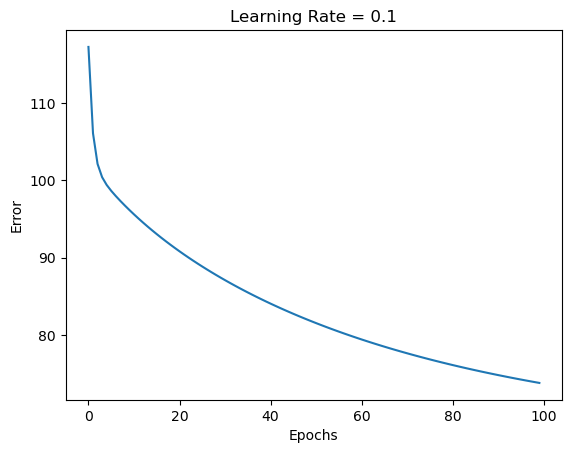

In [47]:
# plot the error
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title("Learning Rate = " + str(alpha))
plt.plot(np.squeeze(error))
plt.show()

### Model Evaluation
Now I am going to apply the knowledge from the trained neural network model on the test data and use it to infer the result. 

In [48]:
# let's now push our test set through the neural network with our learned weights and bias 
Z_predict = np.dot(W, X_test) + b  

# activation function
Y_hat_predict=np.maximum(0,Z_predict)

# define the size
n = X_test.shape[1]  

# error prediction
E_predict = (1 / n) * np.sum(np.square(Y_hat_predict - Y_test))  

Let's look at the error after training. 

In [49]:
# updated error
E_predict

26.657317914740705

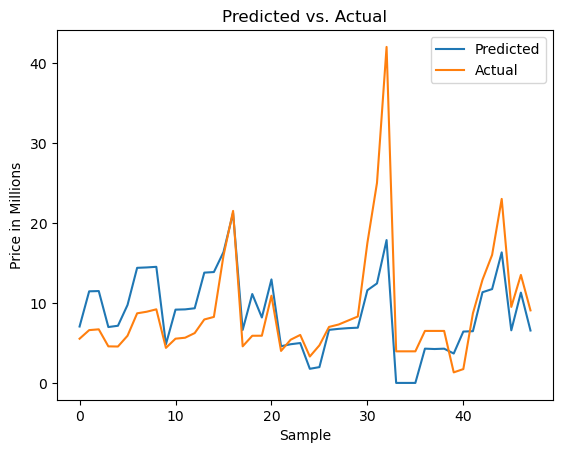

In [50]:
# plot the predicted values vs. the actual values
plt.ylabel('Price in Millions')
plt.xlabel('Sample')
plt.title("Predicted vs. Actual")
plt.plot(np.squeeze(Y_hat_predict),label = "Predicted")
plt.plot(np.squeeze(Y_test), label = "Actual")
plt.legend()
plt.show()

We can see from even this very simple example that a neural net can be setup to train and update its own weights to improve upon its error/cost. 

However, you can also see that using the current single hidden layer network, our predictions are generally correlated but not too accurate,  but the reason for this is that our network is unable to represent complex relationships with only a few weights. However, when we take the same concepts discussed above and apply them across multiple layers with more neurons and adjustable weights/biases more complex relationships can be represented. 